In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
%matplotlib widget


In [ ]:
def hypocycloid(n_list, cols=3, R=1, resolution=1000):
    num_plots = len(n_list)
    rows = (num_plots + cols - 1) // cols
    fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    axs = axs.flatten()

    for i, n in enumerate(n_list):
        ax = axs[i]

        # Draw the current hypocycloid
        r = R / n  # Small circle's radius (ensures N cusps)
        t = np.linspace(0, 2 * np.pi, resolution)  # Parameter

        # Hypocycloid parametric equations
        x = (R - r) * np.cos(t) + r * np.cos(((R - r) / r) * t)
        y = (R - r) * np.sin(t) - r * np.sin(((R - r) / r) * t)

        # Outer fixed circle
        theta = np.linspace(0, 2 * np.pi, resolution)
        circle_x = R * np.cos(theta)
        circle_y = R * np.sin(theta)

        # Plot the outer circle and the hypocycloid
        ax.plot(circle_x, circle_y, 'b-', label="Outer Circle")
        ax.plot(x, y, linewidth=2, label=f"{n}")

        # Draw the cycloids that divide the current n
        for divisor in n_list:
            if divisor < n and n % divisor == 0:
                r_divisor = R / divisor
                x_divisor = (R - r_divisor) * np.cos(t) + r_divisor * np.cos(((R - r_divisor) / r_divisor) * t)
                y_divisor = (R - r_divisor) * np.sin(t) - r_divisor * np.sin(((R - r_divisor) / r_divisor) * t)
                ax.plot(x_divisor, y_divisor, linewidth=1, linestyle='--', label=f"{divisor}")

        ax.axis("equal")
        ax.set_title(f"{n}-Point Hypocycloid", fontsize=8)
        ax.legend(prop={'size': 7})

    # Hide and delete any unused subplots
    for j in range(len(n_list), len(axs)):
        fig.delaxes(axs[j])

    plt.show()


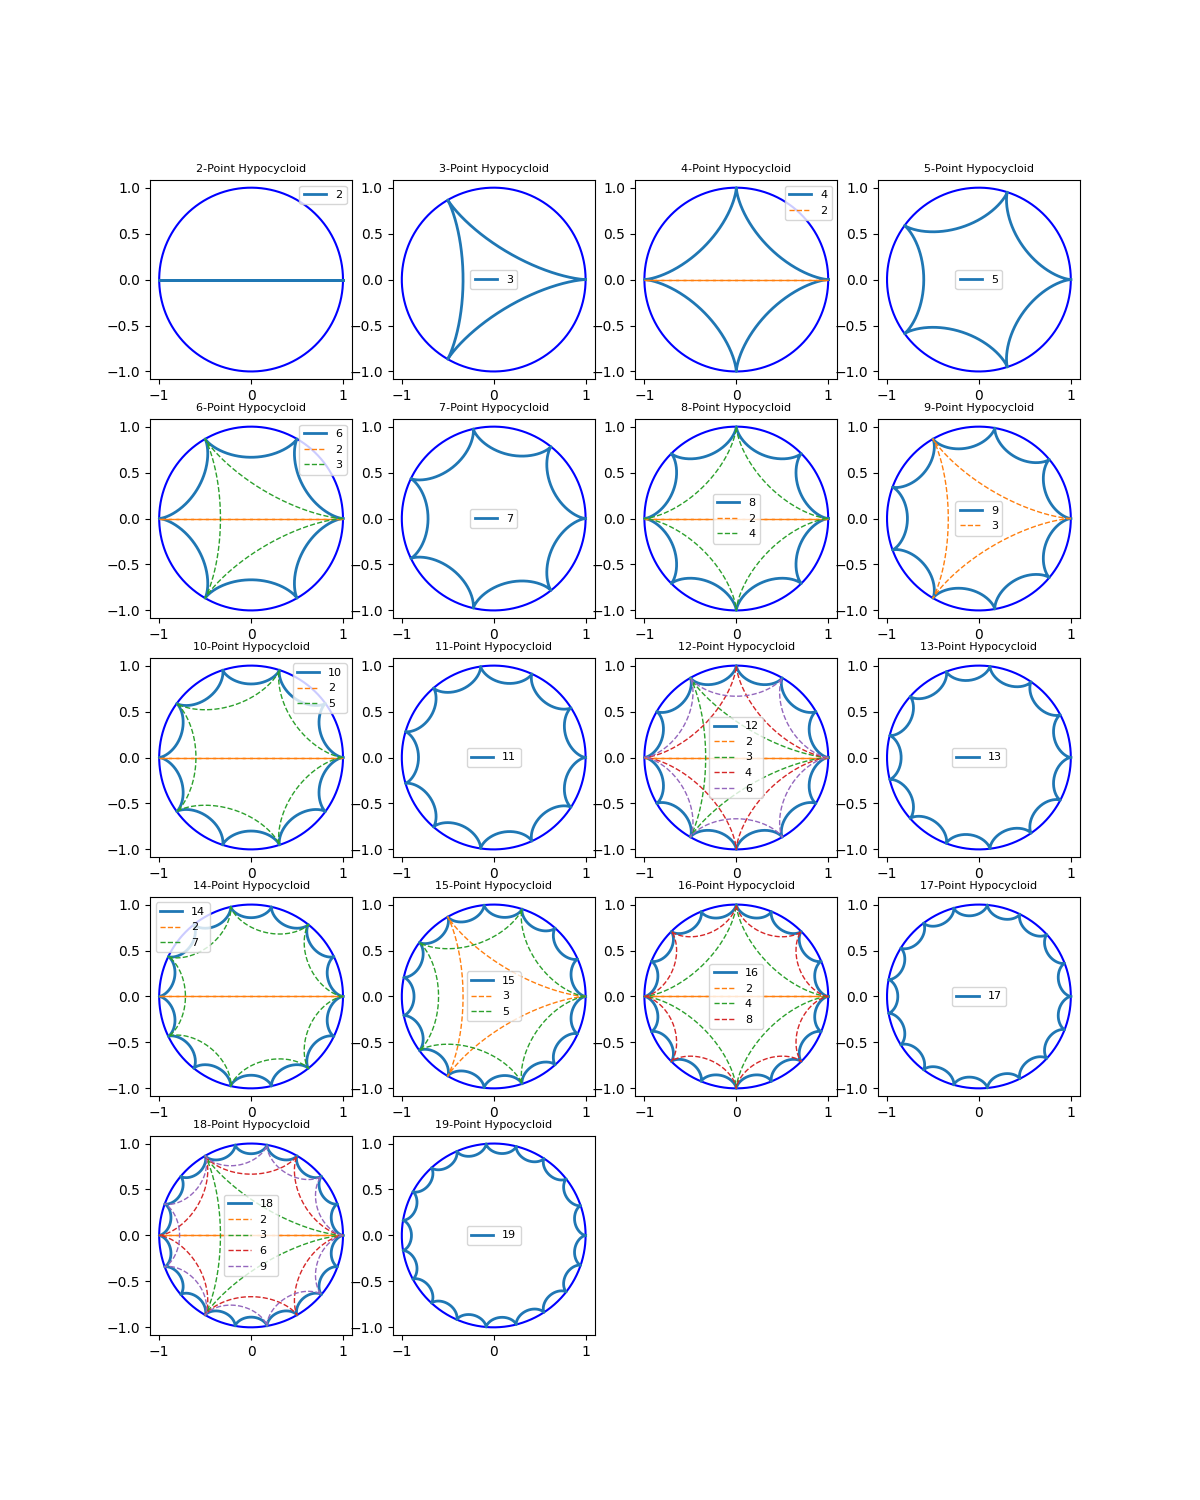

In [3]:
hypocycloid(list(range(2,20)),cols=4)

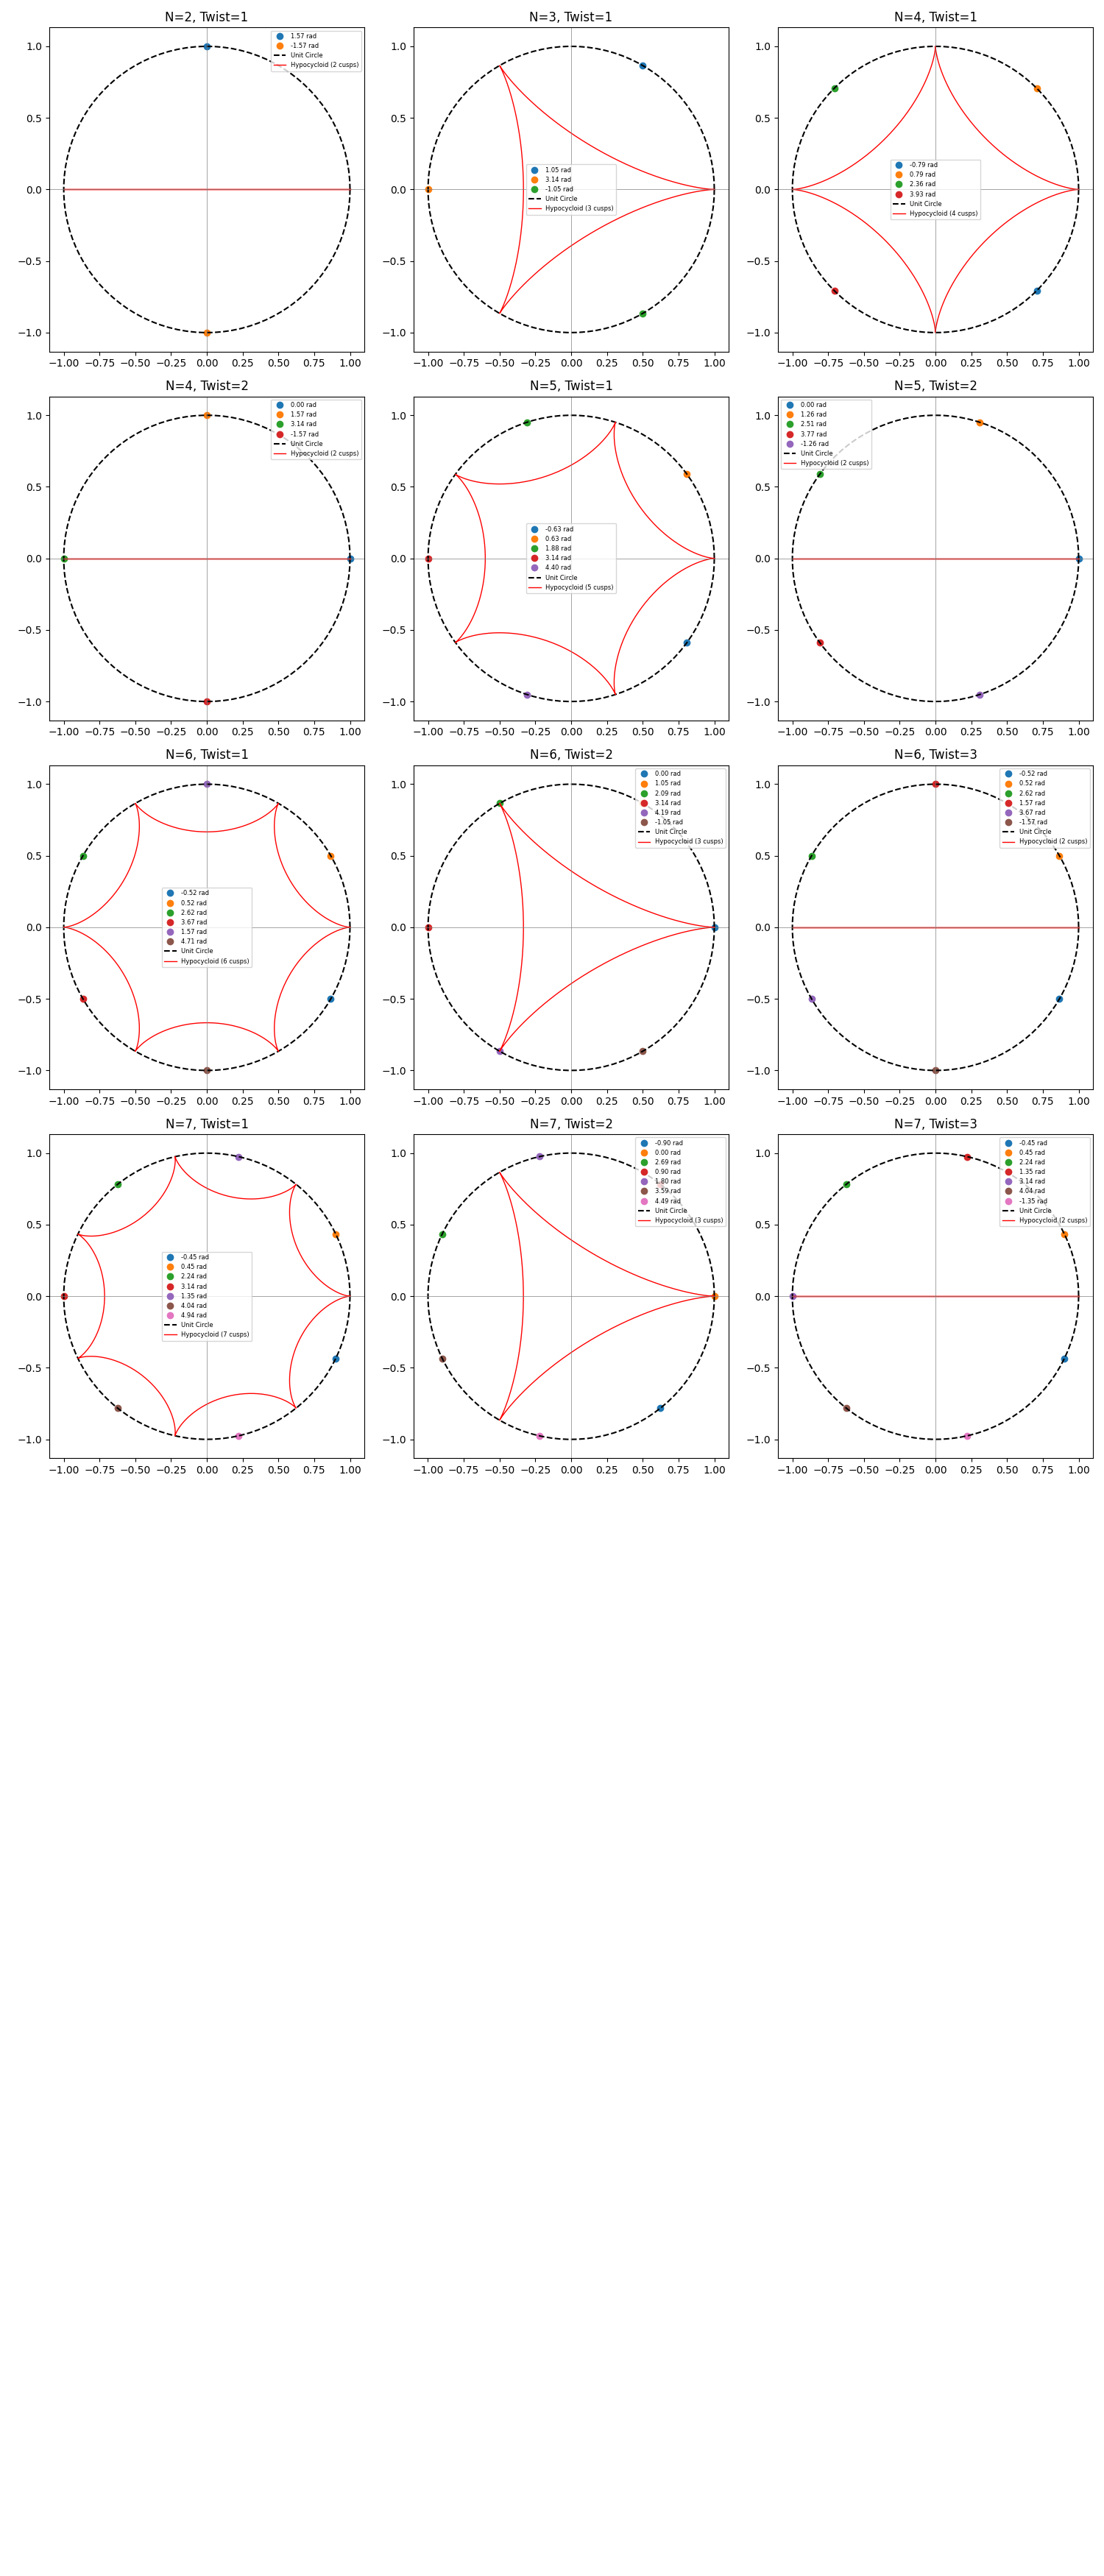

In [ ]:
Max_N = 7
N_set = {N for N in range(1,Max_N +1)}  # Example set of N values
fig, axs = plt.subplots(len(N_set), 3, figsize=(15, 5 * len(N_set)))
axs = axs.flatten()

plot_index = 0
for N in N_set:
    for twist in range(1, int(N/2 + 1)):
        minima = set()
        for n in range(N):
            minima.add(2 * np.pi * n / N - np.pi / N * twist)

        ax = axs[plot_index]
        plot_index += 1

        # Plot minima in the complex plane as arguments
        for angle in minima:
            z = np.exp(1j * angle)  # Convert angle to complex number on unit circle
            ax.plot(z.real, z.imag, 'o', label=f"{angle:.2f} rad")

        # Add unit circle for reference
        theta = np.linspace(0, 2 * np.pi, 100)
        ax.plot(np.cos(theta), np.sin(theta), 'k--', label="Unit Circle")

        # Draw the hypocycloid with N/twist cusps
        if twist != 0:
            num_cusps = m.ceil(N / twist)
            R = 1  # Outer circle radius
            r = R / num_cusps  # Small circle's radius
            t = np.linspace(0, 2 * np.pi, 1000)  # Parameter for hypocycloid
            x = (R - r) * np.cos(t) + r * np.cos(((R - r) / r) * t)
            y = (R - r) * np.sin(t) - r * np.sin(((R - r) / r) * t)
            ax.plot(x, y, 'r-', linewidth=1, label=f"Hypocycloid ({num_cusps} cusps)")

        ax.axhline(0, color='gray', linewidth=0.5)
        ax.axvline(0, color='gray', linewidth=0.5)
        ax.axis("equal")
        ax.set_title(f"N={N}, Twist={twist}")
        ax.legend(prop={'size': 6})

# Hide unused subplots if any
for i in range(plot_index, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()